In [1]:
import tensorflow as tf

Image is in the form `(width, height, Colour Channels)`

### Typical Architecture of a Convolutional Neural Network


- Input Image->Target Images we'd like to discover patterns in
- Input Layer->Takes in target images and preprocesses them for further layers - `input_shape=[batch_size,image_height, image_width, color_channels]`
- Convolutional Layer->Extracts/learns the most important features from target images -> Multiple, can create with `tf.keras.layers.ConvXD`
- Hidden Activation -> adds non-linearity to learned features(non-straight lines) -> Usually ReLU `tf.keras.activations.relu`
- Pooling layer-> Reduces the dimensionality of learned image features -> Average(`tf.keras.layers.AvgPool2D`) or Max(`tf.keras.layers.MaxPool2D`)
- Fully connected layer-> Further refines learned features from convolution layers -> `tf.keras.layers.Dense`
- Output layer->Takes learned features and outputs them in shape of targe labels-> `output_shape=[number_of_classes]
- Output activation->Adds non-linearities to output layer -> `tf.keras.activations.sigmoid`(binary classification) or `tf.keras.activations.softmax`

In [29]:

train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

train_data=train_datagen.flow_from_directory(train_dir,
            batch_size=32,
            target_size=(224,224),
            class_mode="binary",
            seed=42
            )
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,
                                           target_size=(224,224),class_mode="binary",seed=42)

model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"), 
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 392ms/step - loss: 0.6011 - accuracy: 0.6560 - val_loss: 0.4451 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 17s 370ms/step - loss: 0.4607 - accuracy: 0.7860 - val_loss: 0.4066 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 17s 366ms/step - loss: 0.4328 - accuracy: 0.8053 - val_loss: 0.3651 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 17s 364ms/step - loss: 0.4018 - accuracy: 0.8320 - val_loss: 0.3635 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 19s 408ms/step - loss: 0.3626 - accuracy: 0.8453 - val_loss: 0.3299 - val_accuracy: 0.8700


In [12]:
import torch
torch.cuda.is_available()

False

In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_gpu_available()  # Should return True

Num GPUs Available:  0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [16]:
import torch
print(torch.cuda.is_available())  # Should return True
# print(torch.cuda.get_device_name(0))  # Prints your GPU model

False


In [21]:
!nvidia-smi -l 1 

^C


In [23]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6940 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 99ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000


In [24]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Though model_1 has lesser parameters still it has higher accuracy compared to model_2

In [25]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 165ms/step - loss: 3.4160 - accuracy: 0.6313 - val_loss: 2.2059 - val_accuracy: 0.5920
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 1.4339 - accuracy: 0.6773 - val_loss: 0.5775 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 8s 164ms/step - loss: 0.6901 - accuracy: 0.7480 - val_loss: 1.0249 - val_accuracy: 0.6660
Epoch 4/5
47/47 [==============================] - 8s 165ms/step - loss: 0.6318 - accuracy: 0.7493 - val_loss: 0.4505 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 8s 162ms/step - loss: 0.4918 - accuracy: 0.7780 - val_loss: 0.5008 - val_accuracy: 0.7660


In [26]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Binary Classification

In [24]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import os
import random
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)

    img=mpimg.imread(target_folder+"/"+random_image[0])
    # print(os.access(target_folder+"/"+random_image[0], os.R_OK))  # Should return True
    plt.imshow(img)
    # return img

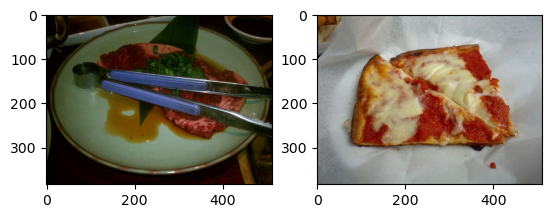

In [25]:
import matplotlib.pyplot as plt
### Plot the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [33]:
# Turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32
                                             )
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

Our images and labels are in batches of 32

In [35]:
images[:2],images[0].shape

(array([[[[0.6117647 , 0.49411768, 0.454902  ],
          [0.654902  , 0.5019608 , 0.48235297],
          [0.6156863 , 0.43921572, 0.427451  ],
          ...,
          [0.5764706 , 0.6431373 , 0.7607844 ],
          [0.58431375, 0.6431373 , 0.7568628 ],
          [0.60784316, 0.6627451 , 0.7686275 ]],
 
         [[0.5137255 , 0.38823533, 0.3372549 ],
          [0.33333334, 0.18431373, 0.14901961],
          [0.28627452, 0.10980393, 0.09019608],
          ...,
          [0.5764706 , 0.6313726 , 0.7372549 ],
          [0.5882353 , 0.6313726 , 0.7411765 ],
          [0.6039216 , 0.6431373 , 0.7490196 ]],
 
         [[0.43529415, 0.29803923, 0.22352943],
          [0.37647063, 0.21176472, 0.15686275],
          [0.41960788, 0.23529413, 0.20392159],
          ...,
          [0.5882353 , 0.6117647 , 0.7058824 ],
          [0.6039216 , 0.627451  , 0.72156864],
          [0.6156863 , 0.63529414, 0.72156864]],
 
         ...,
 
         [[0.30588236, 0.17254902, 0.07450981],
          [0.27058

Due to our `rescale` parameter, the images are now in (224,224,3) shape tensors with values between 0 and 1

In [36]:
labels

array([1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

Due to `class_mode` parameter being `binary` our labels are either `0` or `1`

### 3. Create a model

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [38]:
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
        Conv2D(10,3,activation="relu"),
        Conv2D(10,3,activation="relu"),
        Flatten(),
        Dense(1,activation="sigmoid")
])